<a href="https://colab.research.google.com/github/jyothign0/Deep-Learning/blob/main/IMDB_Movie(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [35]:
sentences=['We love machine learning']

In [36]:
tokenizer=Tokenizer(num_words=10)
tokenizer.fit_on_texts(sentences)

In [37]:
tokenizer.word_index

{'learning': 4, 'love': 2, 'machine': 3, 'we': 1}

In [38]:
sentences=['We love machine learning and We love deep learning']
tokenizer=Tokenizer(num_words=10)
tokenizer.fit_on_texts(sentences)
tokenizer.word_index

{'and': 5, 'deep': 6, 'learning': 3, 'love': 2, 'machine': 4, 'we': 1}

In [39]:
sentences=['We love machine learning!, We love deep learning!']
tokenizer=Tokenizer(num_words=10)
tokenizer.fit_on_texts(sentences)
tokenizer.word_index

{'deep': 5, 'learning': 3, 'love': 2, 'machine': 4, 'we': 1}

In [40]:
import re
 
# initializing string
test_str = "Gfg, is best : for ! Geeks ;"
 
# Removing punctuations in string
# Using regex
res = re.sub(r'[^\w\s]', '', test_str)
 
# printing result
print("The string after punctuation filter : " + res)

The string after punctuation filter : Gfg is best  for  Geeks 


In [41]:
sequences=tokenizer.texts_to_sequences(sentences)
sequences

[[1, 2, 4, 3, 1, 2, 5, 3]]

In [42]:
tokenizer.texts_to_sequences(['We love machine learning','We learn enjoying sequencing'])

[[1, 2, 4, 3], [1]]

In [43]:
#task
sen=['We love machine learning','We are learning tokenization','next we will learn sequencing','we are fortunate to learn from the best trainer','Machine learning and deep learning are fun']
tokenizer=Tokenizer(num_words=50)
tokenizer.fit_on_texts(sen)
tokenizer.texts_to_sequences(sen)

#can we feed this to neural network?
#No. Because its of not same size.
###how to make same size? By padding

[[1, 6, 4, 2],
 [1, 3, 2, 7],
 [8, 1, 9, 5, 10],
 [1, 3, 11, 12, 5, 13, 14, 15, 16],
 [4, 2, 17, 18, 2, 3, 19]]

In [44]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_seq=pad_sequences(sequences,padding='post')    #pad is post then zero will be appended at the end
padded_seq

array([[1, 2, 4, 3, 1, 2, 5, 3]], dtype=int32)

In [45]:
padded_seq=pad_sequences(sequences,padding='post',maxlen=10,truncating='post')    #pad is post then zero will be appended at the end
padded_seq

array([[1, 2, 4, 3, 1, 2, 5, 3, 0, 0]], dtype=int32)

In [14]:
##Preprocessing IMDB movie reviews dataset
import tensorflow_datasets as tfds
imdb,info=tfds.load('imdb_reviews',with_info=True,as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteD7XJ86/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteD7XJ86/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteD7XJ86/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [15]:
import numpy as np
train_data,test_data=imdb['train'],imdb['test']
training_sentences=[]
training_labels=[]
testing_sentences=[]
testing_labels=[]

In [16]:
for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())

In [17]:
for s,l in train_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())

In [18]:
training_labels=np.array(training_labels)
testing_labels=np.array(testing_labels)

In [19]:
len(training_labels)

25000

In [20]:
count=1
for s,l in train_data:
  if count > 3:break
  print(s,l,sep='\n',end='\n\n\n')
  count+=1


tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


tf.Tensor(b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on

In [21]:
count=1
for s in training_sentences:
  if count > 3:break
  print(s,end='\n\n\n')
  count+=1


This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.


I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was co

In [22]:
training_labels[:5]

array([0, 0, 0, 1, 1])

In [23]:
print(len(training_sentences))
print(len(training_labels))
print(len(testing_sentences))
print(len(testing_labels))

25000
25000
25000
25000


In [24]:
vocab_size=10000
embedding_dim=20
max_length=120
trunc_type='post'
oov_token='#OOV'

In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
Word_Index=tokenizer.word_index


training_sequences=tokenizer.texts_to_sequences(training_sentences)
training_padded=pad_sequences(training_sequences,maxlen=max_length,truncating=trunc_type)

testing_sequences=tokenizer.texts_to_sequences(testing_sentences)
testing_padded=pad_sequences(testing_sequences,maxlen=max_length,truncating=trunc_type)

In [26]:
len(Word_Index)

88583

In [27]:
testing_padded[:5]

array([[   0,    0,    0,   12,   14,   33,  425,  392,   18,   90,   28,
           1,    9,   32, 1366, 3585,   40,  486,    1,  197,   24,   85,
         154,   19,   12,  213,  329,   28,   66,  247,  215,    9,  477,
          58,   66,   85,  114,   98,   22, 5675,   12, 1322,  643,  767,
          12,   18,    7,   33,  400, 8170,  176, 2455,  416,    2,   89,
        1231,  137,   69,  146,   52,    2,    1, 7577,   69,  229,   66,
        2933,   16,    1, 2904,    1,    1, 1479, 4940,    3,   39, 3900,
         117, 1584,   17, 3585,   14,  162,   19,    4, 1231,  917, 7917,
           9,    4,   18,   13,   14, 4139,    5,   99,  145, 1214,   11,
         242,  683,   13,   48,   24,  100,   38,   12, 7181, 5515,   38,
        1366,    1,   50,  401,   11,   98, 1197,  867,  141,   10],
       [   0,    0,    0,    0,    0,    0,    0,    0,   11,   26,   75,
         571,    6,  805, 2354,  313,  106,   19,   12,    7,  629,  686,
           6,    4, 2219,    5,  181,  584,

In [28]:
model=tf.keras.Sequential([
                           tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
                           tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                           tf.keras.layers.Dense(32,activation='relu'),
                           tf.keras.layers.Dense(1,activation='sigmoid')
])

In [29]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 20)           200000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              43520     
 l)                                                              
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 247,681
Trainable params: 247,681
Non-trainable params: 0
_________________________________________________________________


In [30]:
history=model.fit(
    training_padded,
    training_labels,
    epochs=10,
    validation_data=(testing_padded,testing_labels)
)

Epoch 1/10
782/782 [==============================] - 66s 75ms/step - loss: 0.4621 - accuracy: 0.7711 - val_loss: 0.2824 - val_accuracy: 0.9006
Epoch 2/10
782/782 [==============================] - 58s 74ms/step - loss: 0.2905 - accuracy: 0.8841 - val_loss: 0.1930 - val_accuracy: 0.9356
Epoch 3/10
782/782 [==============================] - 58s 74ms/step - loss: 0.2251 - accuracy: 0.9126 - val_loss: 0.1451 - val_accuracy: 0.9523
Epoch 4/10
782/782 [==============================] - 58s 74ms/step - loss: 0.1731 - accuracy: 0.9347 - val_loss: 0.1092 - val_accuracy: 0.9614
Epoch 5/10
782/782 [==============================] - 58s 74ms/step - loss: 0.1271 - accuracy: 0.9529 - val_loss: 0.1184 - val_accuracy: 0.9655
Epoch 6/10
782/782 [==============================] - 58s 74ms/step - loss: 0.0990 - accuracy: 0.9645 - val_loss: 0.0522 - val_accuracy: 0.9865
Epoch 7/10
782/782 [==============================] - 58s 74ms/step - loss: 0.0637 - accuracy: 0.9780 - val_loss: 0.0419 - val_accuracy:

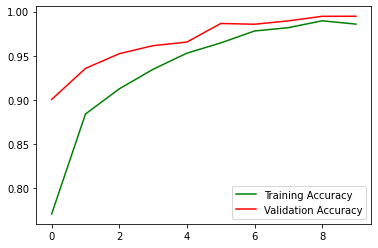

In [32]:
#plot
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.figure()
plt.plot(acc, color = 'green', label = 'Training Accuracy')
plt.plot(val_acc, color = 'red', label = 'Validation Accuracy')
plt.legend()

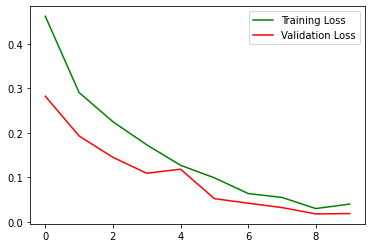

In [33]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure()
plt.plot(loss, color = 'green', label = 'Training Loss')
plt.plot(val_loss, color = 'red', label = 'Validation Loss')
plt.legend()